![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Face Mask Prediction using U-Net
Task is to predict the mask around the face in a given image.

# Instructions
- Some part of the code is already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

## Dataset
Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [2]:
import numpy as np
import tensorflow as tf
import math

In [3]:
data = np.load('/content/drive/MyDrive/ACV assignment/images.npy', allow_pickle = True)

In [4]:
data.shape

(409, 2)

### Check one sample from the loaded "images.npy" file  (2 marks)
- Hint: print data[10][1] 

In [ ]:
print(data[15][1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.26266666666666666, 'y': 0.08266666666666667}, {'x': 0.3973333333333333, 'y': 0.3893333333333333}], 'imageWidth': 750, 'imageHeight': 375}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.49866666666666665, 'y': 0.050666666666666665}, {'x': 0.5973333333333334, 'y': 0.2613333333333333}], 'imageWidth': 750, 'imageHeight': 375}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.6773333333333333, 'y': 0.112}, {'x': 0.7906666666666666, 'y': 0.368}], 'imageWidth': 750, 'imageHeight': 375}]


### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [5]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [6]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

In [7]:
X.shape

(409, 224, 224, 3)

In [8]:
masks.shape

(409, 224, 224)

In [9]:
np.unique(masks)

array([0., 1.])

### Split the data into training and testing (2 marks)
- 400 images in training
- 9 images in testing data

Training data

In [7]:
X_train = X[0:400]
y_train = masks[0:400]

In [8]:
print(X_train.shape, y_train.shape)

(400, 224, 224, 3) (400, 224, 224)


Testing data

In [9]:
X_test = X[400:]
y_test = masks[400:]

In [10]:
print(X_test.shape, y_test.shape)

(9, 224, 224, 3) (9, 224, 224)


### Print a sample training image, image array and its mask (2 marks)

Print the image and image array

In [11]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


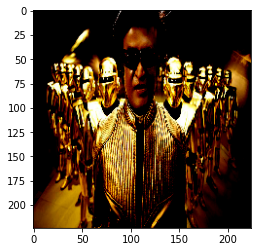

In [12]:
plt.imshow(X_train[143])

In [ ]:
print(X_train[143])

[[[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[ 0.26274514  0.05098045 -0.63921571]
  [ 0.27843142  0.06666672 -0.65490198]
  [ 0.28627455  0.07450986 -0.64705884]
  ...
  [-0.41960782 -0.6156863  -0.90588236]
  [-0.50588238 -0.63921571 -0.9137255 ]
  [-0.56078434 -0.69411767 -0.94509804]]

 [

Print the mask

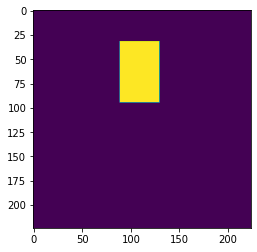

In [15]:
plt.imshow(y_train[143])

In [ ]:
print(y_train[143])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Create the model (5 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [13]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable

    block1 = model.get_layer("conv_pw_1_relu").output #112*112
    block2 = model.get_layer("conv_pw_3_relu").output #56*56
    block3 = model.get_layer("conv_pw_5_relu").output #28*28
    block4 = model.get_layer("conv_pw_11_relu").output #14*14
    block5 = model.get_layer("conv_pw_13_relu").output #7*7

    decoder = Concatenate()([UpSampling2D()(block5), block4])
    decoder = Concatenate()([UpSampling2D()(decoder), block3])
    decoder = Concatenate()([UpSampling2D()(decoder), block2])
    decoder = Concatenate()([UpSampling2D()(decoder), block1])
    decoder = UpSampling2D()(decoder)

    decoder= Conv2D(1, kernel_size=1, activation="sigmoid")(decoder)
    decoder= Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(decoder)

    return Model(inputs=model.input, outputs=decoder)

### Call the create_model function (1 mark)
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [14]:
model = create_model(True)

17227776/17225924 [==============================] - 0s 0us/step


### Print model summary (1 mark)

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 112, 112, 32) 0           conv1_bn[0][0]                   
______________________________________________________________________________________________

### Define dice coefficient function (2 marks)
- Create a function to calculate dice coefficient


In [16]:
from tensorflow.keras.backend import epsilon

In [17]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + epsilon())

### Define loss function (2 marks)

In [18]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tf.math.log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [19]:
model.compile(loss=loss, optimizer='adam', metrics=[dice_coefficient])

### Define callbacks (2 marks)
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [21]:
checkpoint = ModelCheckpoint("Facemask.h5", monitor="val_loss", verbose=1, save_best_only=True, save_weights_only=True, mode="auto")
stop = EarlyStopping(monitor="val_loss", patience=5, mode="auto")
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="auto")

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [22]:
model.fit(X_train, y_train,batch_size = 1, epochs = 30, callbacks = [checkpoint, reduce_lr,stop], validation_data = (X_test, y_test))

Epoch 1/30
400/400 [==============================] - 55s 53ms/step - loss: 1.2079 - dice_coefficient: 0.5104 - val_loss: 1.3796 - val_dice_coefficient: 0.4463

Epoch 00001: val_loss improved from inf to 1.37961, saving model to Facemask.h5
Epoch 2/30
400/400 [==============================] - 21s 53ms/step - loss: 0.8461 - dice_coefficient: 0.6060 - val_loss: 1.8864 - val_dice_coefficient: 0.4186

Epoch 00002: val_loss did not improve from 1.37961
Epoch 3/30
400/400 [==============================] - 22s 54ms/step - loss: 0.7446 - dice_coefficient: 0.6389 - val_loss: 0.8764 - val_dice_coefficient: 0.5493

Epoch 00003: val_loss improved from 1.37961 to 0.87640, saving model to Facemask.h5
Epoch 4/30
400/400 [==============================] - 22s 54ms/step - loss: 0.6566 - dice_coefficient: 0.6735 - val_loss: 1.5031 - val_dice_coefficient: 0.4670

Epoch 00004: val_loss did not improve from 0.87640
Epoch 5/30
400/400 [==============================] - 22s 54ms/step - loss: 0.6137 - dice_

### Get the predicted mask for a test image   (2 marks)

Show the test image

In [23]:
test_img = X_test[3]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


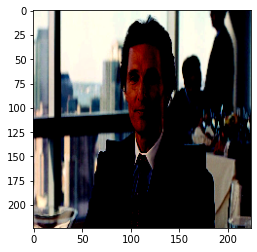

In [24]:
plt.imshow(test_img)

Show original mask for test image

In [25]:
test_mask = y_test[3]

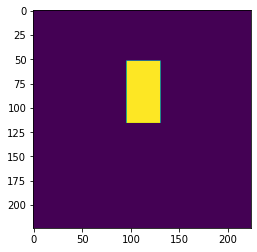

In [26]:
plt.imshow(test_mask)

Predict the mask on the test image

In [27]:
model = create_model()
model.load_weights('Facemask.h5')

In [28]:
prediction = model.predict(np.array([test_img]))[0]

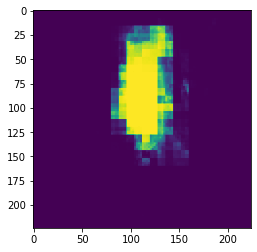

In [29]:
plt.imshow(prediction)

### Impose the mask on the test image (2 marks)
- In imshow use the alpha parameter and set it to greater than 0.5

In [30]:
predicted_mask = cv2.resize(1.0*(model.predict(x=np.array([test_img]))[0] > 0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))

In [31]:
image = cv2.resize(test_img,(IMAGE_WIDTH,IMAGE_HEIGHT))

In [32]:
image = cv2.resize(test_img,(IMAGE_WIDTH,IMAGE_HEIGHT))

img= image
img[:,:,0] = predicted_mask*image[:,:,0]
img[:,:,1] = predicted_mask*image[:,:,1]
img[:,:,2] = predicted_mask*image[:,:,2]

out_image = img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


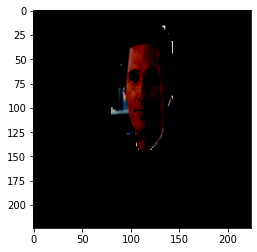

In [33]:
plt.imshow(img)

In [87]:
!jupyter nbconvert --to html Advance_Computer_Vision_with_CNN_R9_Project1_FaceMaskPrediction_using_U_Net_1.ipynb

[NbConvertApp] Converting notebook Advance_Computer_Vision_with_CNN_R9_Project1_FaceMaskPrediction_using_U_Net_1.ipynb to html
[NbConvertApp] Writing 573357 bytes to Advance_Computer_Vision_with_CNN_R9_Project1_FaceMaskPrediction_using_U_Net_1.html
